In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
dataset = pd.read_csv("Breast Cancer.csv")

In [ ]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.shape

(569, 33)

In [ ]:
#Extract features from the dataset
X = dataset.iloc[:, 2:32].values
y = dataset.iloc[:, 1].values

In [ ]:
print(dataset.iloc[:, 1].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [ ]:
#Encode data
lb_enc = LabelEncoder()

#Fit transform the y data with the encoder
y = lb_enc.fit_transform(y)

In [ ]:
#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

In [ ]:
#implementing the model
my_first_nn = Sequential() # create model

my_first_nn.add(layers.Dense(32, input_dim=30, activation='relu')) # Input layer

my_first_nn.add(layers.Dense(64, activation='relu')) # hidden layer
my_first_nn.add(layers.Dense(128, activation='relu')) # hidden layer

my_first_nn.add(Dense(1, activation='sigmoid')) # output layer


my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

my_first_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,553
Trainable params: 11,553
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_first_nn_fitted = my_first_nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 6.4194 - acc: 0.5751
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 2.0321 - acc: 0.7207
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.8008 - acc: 0.8545
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5214 - acc: 0.8732
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5842 - acc: 0.7700
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4439 - acc: 0.8427
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2414 - acc: 0.9085
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3508 - acc: 0.8803
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4716 - acc: 0.8732
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3817 - acc: 0.8709
Epoch 11/100
14/14 [==============================] - 0s 3m

In [ ]:
# Calculate the accuracy of the model
scores = my_first_nn.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.2641 - acc: 0.9091


In [ ]:
# Print the scores found
print(scores)

[0.264078289270401, 0.9090909361839294]


### a) Add more Dense layers to existing code and check how the accuracy changes

In [ ]:
#implementing the model
dense = Sequential() # create model

dense.add(layers.Dense(32, input_dim=30, activation='relu')) # Input layer
dense.add(layers.Dense(64, activation='relu')) # hidden layer
dense.add(layers.Dense(128, activation='relu')) # hidden layer

# Add more dense layers to the model
dense.add(layers.Dense(16, activation='relu')) # hidden layer
dense.add(layers.Dense(8, activation='relu')) # hidden layer
dense.add(Dense(1, activation='sigmoid')) # output layer

dense.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
dense.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                992       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 16)                2064      
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,633
Trainable params: 13,633
Non-trai

In [ ]:
#Fit the new model with the training data
dense_fitted = dense.fit(X_train, y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 1.3908 - acc: 0.6197
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5167 - acc: 0.8310
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3851 - acc: 0.8826
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3263 - acc: 0.8920
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2892 - acc: 0.9131
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2761 - acc: 0.9085
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2596 - acc: 0.9131
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2309 - acc: 0.9085
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2823 - acc: 0.8944
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2281 - acc: 0.9155
Epoch 11/100
14/14 [==============================] - 0s 3m

In [ ]:
# Calculate the accuracy of the model
dense_scores = dense.evaluate(X_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.1720 - acc: 0.9371


In [ ]:
# Print the scores found
print(dense_scores)

[0.17197559773921967, 0.9370629191398621]


Comparing the accuracies of the two models, we can see that the accuracy increased and the loss decreased when adding more dense layers to the model. Although the accuracy shows a positive trend with increase the number of dense layers, we have to be careful not to overfit the data.

### b) Add the validation data attribute to the fit method

In [ ]:
# Pass the validation data X_test and Y_test in the fit method
my_first_nn2 = my_first_nn.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2041 - acc: 0.9202 - val_loss: 0.6194 - val_acc: 0.8671
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3335 - acc: 0.9108 - val_loss: 0.3791 - val_acc: 0.8741
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1992 - acc: 0.9296 - val_loss: 0.3431 - val_acc: 0.9091
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3222 - acc: 0.9085 - val_loss: 0.7628 - val_acc: 0.7902
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6869 - acc: 0.8592 - val_loss: 0.3089 - val_acc: 0.9301
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5352 - acc: 0.8756 - val_loss: 0.1985 - val_acc: 0.9441
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3058 - acc: 0.9155 - val_loss: 0.4066 - val_acc: 0.9161
Epoch 8/100
14/14 [==============================] - 0s 6ms/step - loss: 0.2879 - a

### c) Plot accuracy for training and validation of the fitted model

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# check key values 
print(my_first_nn2.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


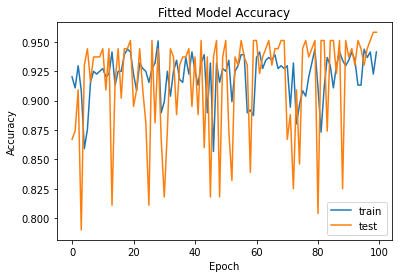

In [ ]:
#Plot the accuracies of the training and testing datasets from the fitted model
plt.plot(my_first_nn2.history['acc'])
plt.plot(my_first_nn2.history['val_acc'])

#Modify the graph to have the correct labels
plt.title('Fitted Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

Looking at the graph, we can see that the training and testing accuracies follow similar trends as epoch increases. The main difference between the two being that testing accuracy has very sharp max and min spikes as epoch increases.

### d) Plot the loss for training and validation of the fitted model

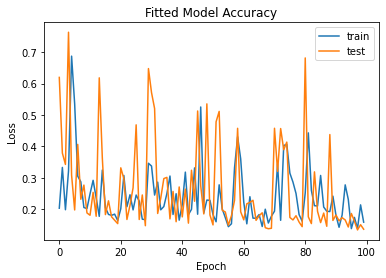

In [ ]:
#Plot the losses of the training and testing datasets from the fitted model
plt.plot(my_first_nn2.history['loss'])
plt.plot(my_first_nn2.history['val_loss'])

#Modify the graph to have the correct labels
plt.title('Fitted Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

The graph shows that the training and testing losses follow similar trends as epoch increases. Similar to the accuracy graph, the testing loss shows more prominant min and max spikes as epoch increases.

### e) Normalize the data before feeding it to the model and check how normalization affects accuracy

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()

In [ ]:
#Scale the X training and testing datasets
sc.fit(X_train)
scaled_X_train = sc.transform(X_train)
sc.fit(X_test)
scaled_X_test = sc.transform(X_test)

In [ ]:
#implementing the model
model3 = Sequential() # create model

# Change the input_dim for the input from 1 to 8
model3.add(layers.Dense(32, input_dim=30, activation='relu')) # Input layer

model3.add(layers.Dense(64, activation='relu')) # hidden layer

model3.add(layers.Dense(128, activation='relu')) # hidden layer

model3.add(layers.Dense(1, activation='sigmoid')) # output layer

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                992       
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11,553
Trainable params: 11,553
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the scaled data to the model
scaled_fit = model3.fit(scaled_X_train, y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 0.5125 - acc: 0.9178
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2518 - acc: 0.9484
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.1302 - acc: 0.9648
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0856 - acc: 0.9742
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0668 - acc: 0.9812
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0581 - acc: 0.9812
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0507 - acc: 0.9883
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0462 - acc: 0.9859
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0413 - acc: 0.9859
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0366 - acc: 0.9883
Epoch 11/100
14/14 [==============================] - 0s 3m

In [ ]:
# Find the accuracy and loss of the scaled model
scores3 = model3.evaluate(scaled_X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.2161 - acc: 0.9510


In [ ]:
# Present the scores found
print(scores3)

[0.2160700112581253, 0.9510489702224731]


Compared to the original model, the scaled model has a lower loss and a higher accuracy. 